1. Load a built-in dataset from Scikit-Learn to understand its
structure. Perform basic data pre-processing steps such as handling
missing values and encoding categorical variables.

## Load Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas DataFrame from the data and feature names
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

print("Diabetes dataset loaded into DataFrame 'df'. First 5 rows:")
print(df.head())

Diabetes dataset loaded into DataFrame 'df'. First 5 rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


## Explore Dataset Structure


In [2]:
print(f"DataFrame shape (rows, columns): {df.shape}")
print("\nDataFrame Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

DataFrame shape (rows, columns): (442, 11)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB

Descriptive Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4

## Check for Missing Values

In [3]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


## Identify Categorical Variables

In [4]:
print("Unique values in 'sex' column:")
print(df['sex'].unique())

print("\nBased on the data description and unique values, the 'sex' column is identified as a categorical feature, encoded numerically. No other features appear to be categorical and require encoding based on the structure and nature of the dataset.")

Unique values in 'sex' column:
[ 0.05068012 -0.04464164]

Based on the data description and unique values, the 'sex' column is identified as a categorical feature, encoded numerically. No other features appear to be categorical and require encoding based on the structure and nature of the dataset.


## Encode Categorical Variables

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'sex' column
df['sex'] = le.fit_transform(df['sex'])

print("Unique values in 'sex' column after encoding:")
print(df['sex'].unique())
print(f"Data type of 'sex' column after encoding: {df['sex'].dtype}")

Unique values in 'sex' column after encoding:
[1 0]
Data type of 'sex' column after encoding: int64


## Visualize Feature Distributions

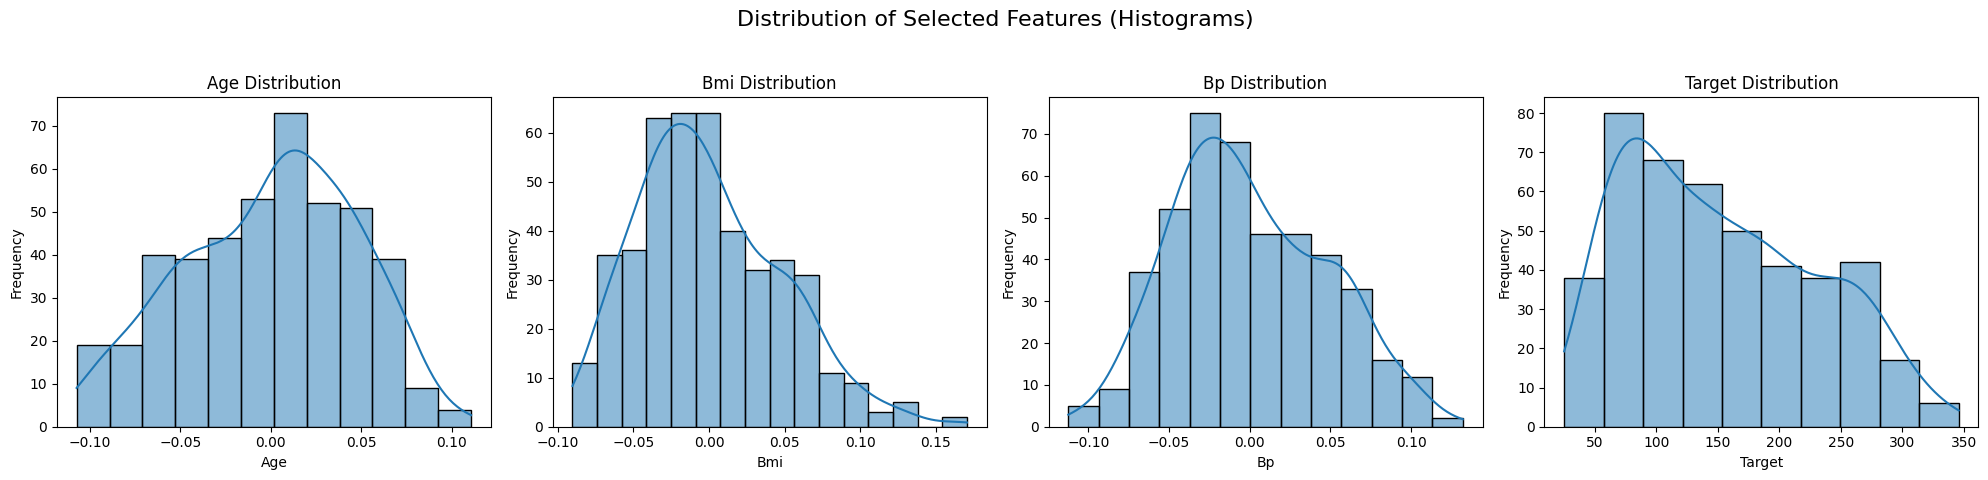

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and target for visualization
features_to_visualize = ['age', 'bmi', 'bp', 'target']

# Create a figure and a set of subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_visualize), figsize=(20, 5))
fig.suptitle('Distribution of Selected Features (Histograms)', fontsize=16)

for i, feature in enumerate(features_to_visualize):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} Distribution')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

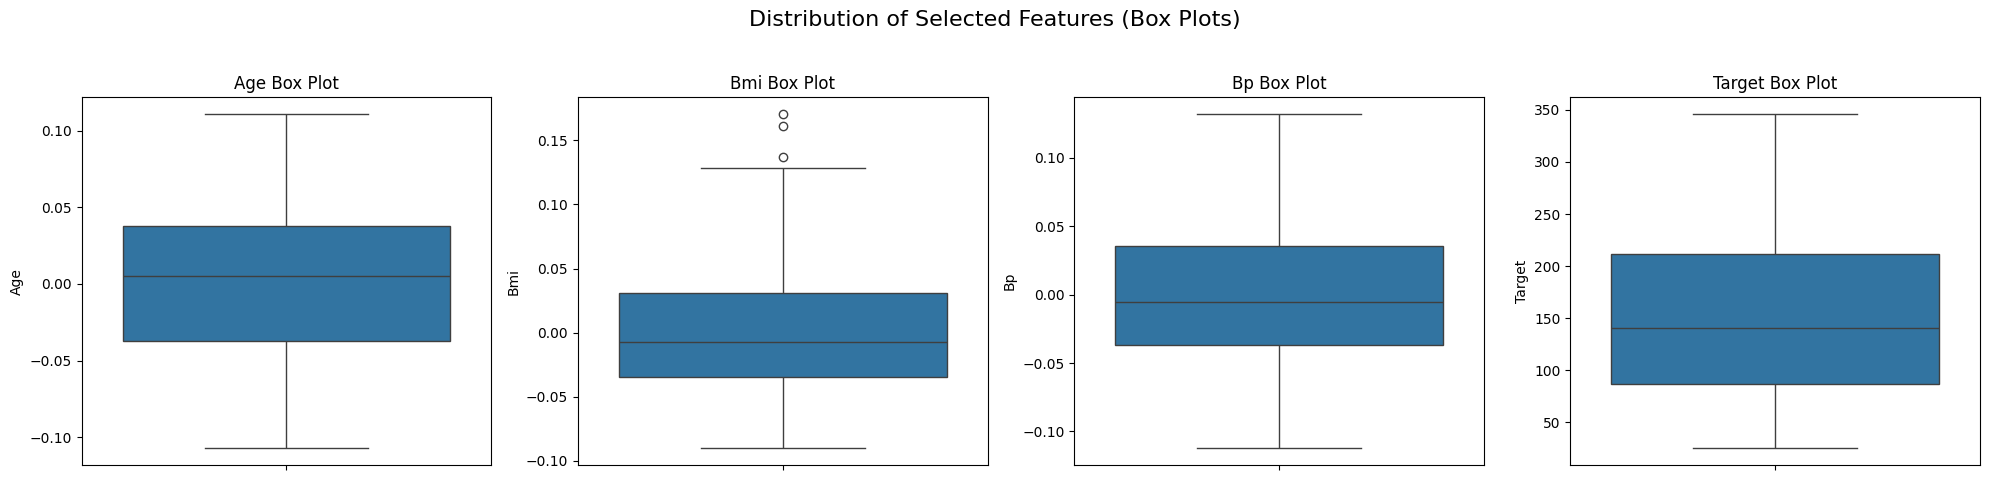

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and target for visualization
features_to_visualize = ['age', 'bmi', 'bp', 'target']

# Create a figure and a set of subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_visualize), figsize=(20, 5))
fig.suptitle('Distribution of Selected Features (Box Plots)', fontsize=16)

for i, feature in enumerate(features_to_visualize):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} Box Plot')
    axes[i].set_ylabel(feature.capitalize())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()